In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

## Parameters

In [2]:
ORGANISMS = [9606]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERMS_CLASSES = [
    "monosaccharide transmembrane transporter activity",
    "amino acid:monoatomic cation symporter activity",
]
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_human_sugaramino"
# TODO pathlib
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = True  # TODO If false, use cached results, e.g. to create more plots

## Full dataset

In [3]:
# Get full dataset for stats. Dataset for analysis is created in cell below.
dataset_unfiltered = get_transmembrane_transporter_dataset( 
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 3874 sequences into 1029 clusters at threshold 50
cd-hit: clustered 3874 sequences into 1347 clusters at threshold 70
cd-hit: clustered 3874 sequences into 1774 clusters at threshold 90
cd-hit: clustered 3874 sequences into 3408 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              50                       1   
                                                                          70                       1   
                                                                          90                       5   
                                                                          100                      9   
                                                                          None                    10   
                                               transcript_level           50                      54   
                                                                          70                      77   
                                                                          90                     152   
                                                                          100                    665   
                                                                          None                   771   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       1   
                                                                          100                      2   
                                                                          None                     2   
                   True          computational protein_level              50                     142   
                                                                          70                     211   
                                                                          90                     419   
                                                                          100                   1031   
                                                                          None                  1175   
                                               transcript_level           50                      31   
                                                                          70                      46   
                                                                          90                     100   
                                                                          100                    501   
                                                                          None                   687   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       2   
                                                                          100                      4   
                                                                          None                     5   
True               True          computational protein_level              50                     552   
                                                                          70                     741   
                                                                          90                     819   
                                                                          100                    919   
                                                                          None                   945   
                                               transcript_level           50                       6   
                                                                          70                      10   
                              

## Filtered Subset

In [ ]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

In [ ]:
from subpred.util import load_data

network = load_data("go_obo")

amino_predec = set(network.predecessors("GO:0015171")) | {"GO:0015171"}

df_goa = dataset_organism[1]

df_goa[df_goa.go_id_ancestor.isin(amino_predec)][
    ["Uniprot", "go_term_ancestor"]
].drop_duplicates().groupby("go_term_ancestor").count().sort_values(
    "Uniprot", ascending=False
)

# TODO try 
# L-amino acid transmembrane transporter activity	59
# neutral L-amino acid transmembrane transporter activity	39

,Uniprot
go_term_ancestor,
amino acid transmembrane transporter activity,96
L-amino acid transmembrane transporter activity,59
neutral L-amino acid transmembrane transporter activity,39
amino acid:monoatomic cation symporter activity,27
basic amino acid transmembrane transporter activity,19
acidic amino acid transmembrane transporter activity,18
glutamate-gated receptor activity,17
gamma-aminobutyric acid transmembrane transporter activity,8
amino acid:monoatomic cation antiporter activity,5


In [ ]:
network = load_data("go_obo")

sugar_predec = set(network.predecessors("GO:0051119")) | {"GO:0051119"}

df_goa = dataset_organism[1]

df_goa[df_goa.go_id_ancestor.isin(sugar_predec)][
    ["Uniprot", "go_term_ancestor"]
].drop_duplicates().groupby("go_term_ancestor").count().sort_values(
    "Uniprot", ascending=False
)

,Uniprot
go_term_ancestor,
sugar transmembrane transporter activity,26
monosaccharide transmembrane transporter activity,24


## Sugar/Amino subset

In [ ]:
from subpred.dataset_filters import get_classification_subset
dataset_organism = get_classification_subset(dataset_full=dataset_organism, go_terms=GO_TERMS_CLASSES)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
amino acid:monoatomic cation symporter activity    27
sugar transmembrane transporter activity           26
Name: count, dtype: int64

In [ ]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
amino acid:monoatomic cation symporter activity    27
sugar transmembrane transporter activity           25
Name: count, dtype: int64

Clustering at 70%

In [ ]:
from subpred.dataset_filters import cluster_sequences
dataset_organism = cluster_sequences(dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 52 sequences into 49 clusters at threshold 70


go_term_ancestor
amino acid:monoatomic cation symporter activity    25
sugar transmembrane transporter activity           24
Name: count, dtype: int64

## Feature generation

In [ ]:
from subpred.features import get_features
features_list, series_labels = get_features(dataset_full=dataset_organism)

MRAVLDTADIAIVALYFILVMCIGFFAMWKSNRSTVSGYFLAGRSMTWVAIGASLFVSNIGSEHFIGLAGSGAASGFAVGAWEFNALLLLQLLGWVFIPIYIRSGVYTMPEYLSKRFGGHRIQVYFAALSLILYIFTKLSVDLYSGALFIQESLGWNLYVSVILLIGMTALLTVTGGLVAVIYTDTLQALLMIIGALTLMIISIMEIGGFEEVKRRYMLASPDVTSILLTYNLSNTNSCNVSPKKEALKMLRNPTDEDVPWPGFILGQTPASVWYWCADQVIVQRVLAAKNIAHAKGSTLMAGFLKLLPMFIIVVPGMISRILFTDDIACINPEHCMLVCGSRAGCSNIAYPRLVMKLVPVGLRGLMMAVMIAALMSDLDSIFNSASTIFTLDVYKLIRKSASSRELMIVGRIFVAFMVVISIAWVPIIVEMQGGQMYLYIQEVADYLTPPVAALFLLAIFWKRCNEQGAFYGGMAGFVLGAVRLILAFAYRAPECDQPDNRPGFIKDIHYMYVATGLFWVTGLITVIVSLLTPPPTKEQIRTTTFWSKKNLVVKENCSPKEEPYQMQEKSILRCSENNETINHIIPNGKSEDSIKGLQPEDVNLLVTCREEGNPVASLGHSEAETPVDAYSNGQAALMGEKERKKETDDGGRYWKFIDWFCGFKSKSLSKRSLRDLMEEEAVCLQMLEETRQVKVILNIGLFAVCSLGIFMFVYFSL
MRAVLDTADIAIVALYFILVMCIGFFAMWKSNRSTVSGYFLAGRSMTWVAIGASLFVSNIGSEHFIGLAGSGAASGFAVGAWEFNALLLLQLLGWVFIPIYIRSGVYTMPEYLSKRFGGHRIQVYFAALSLILYIFTKLSVDLYSGALFIQESLGWNLYVSVILLIGMTALLTVTGGLVAVIYTDTLQALLMIIGALTLMIISIMEIGGFEEVKRRYMLASPDVTSILLTYNLSNTNSCNVSPKKEALKMLRNPTDEDVPWPGFILGQTPASVWYWCADQV

For each Feature: Outlier detection, numpy conversion 

In [ ]:
from subpred.features import get_ml_datasets
ml_datasets = list(get_ml_datasets(features_list=features_list, series_labels=series_labels))
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 49, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'sugar transmembrane transporter activity']),
 Name: AAC, Features: 20, Samples: 49, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'sugar transmembrane transporter activity']),
 Name: PAAC, Features: 400, Samples: 49, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'sugar transmembrane transporter activity']),
 Name: AA_KMER3, Features: 8000, Samples: 49, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_COMP, Features: 20, Samples: 49, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 49, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'sugar transmembrane transporter activity']),
 Na

In [ ]:
# saving as pickle, to load in different notebook with different env, 
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle
with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", 'wb') as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [ ]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_organism,ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor
Uniprot,,,


## Model evaluation SVM

In [ ]:
ml_datasets[0]

Name: DUMMY, Features: 1024, Samples: 49, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
 'sugar transmembrane transporter activity'])

In [ ]:
from subpred.evaluation import get_svm_results, plot_results_long, summarize_results_long
from sklearn.metrics import f1_score, make_scorer

scoring_outer = {
    "Balanced Accuracy": "balanced_accuracy",
    "F1 Macro": "f1_macro",
    "F1 Amino Acid": make_scorer(
        f1_score, pos_label=0
    ),  # labels are encoded in lex. order
    "F1 Sugar": make_scorer(f1_score, pos_label=1),
}

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    inner_cv=5,
    outer_cv=5,
    repeats=10,
    n_jobs_inner=1,
    n_jobs_outer=-1,
    scoring_inner="balanced_accuracy",
    scoring_outer=scoring_outer,
)

=== DUMMY ===
Balanced Accuracy: 0.54+-0.15
F1 Macro: 0.51+-0.17
F1 Amino Acid: 0.55+-0.18
F1 Sugar: 0.48+-0.22
=== AAC ===
Balanced Accuracy: 0.73+-0.15
F1 Macro: 0.73+-0.16
F1 Amino Acid: 0.73+-0.18
F1 Sugar: 0.73+-0.15
=== PAAC ===
Balanced Accuracy: 0.87+-0.12
F1 Macro: 0.87+-0.13
F1 Amino Acid: 0.88+-0.11
F1 Sugar: 0.85+-0.15
=== AA_KMER3 ===
Balanced Accuracy: 0.91+-0.09
F1 Macro: 0.90+-0.09
F1 Amino Acid: 0.90+-0.10
F1 Sugar: 0.91+-0.09
=== 3Di_COMP ===
Balanced Accuracy: 0.87+-0.10
F1 Macro: 0.87+-0.10
F1 Amino Acid: 0.87+-0.11
F1 Sugar: 0.87+-0.11
=== 3Di_KMER2 ===
Balanced Accuracy: 0.90+-0.08
F1 Macro: 0.90+-0.09
F1 Amino Acid: 0.91+-0.08
F1 Sugar: 0.89+-0.11
=== 3Di_KMER3 ===
Balanced Accuracy: 0.94+-0.08
F1 Macro: 0.94+-0.08
F1 Amino Acid: 0.94+-0.08
F1 Sugar: 0.93+-0.09
=== COMB_KMER1 ===
Balanced Accuracy: 0.83+-0.12
F1 Macro: 0.83+-0.12
F1 Amino Acid: 0.84+-0.12
F1 Sugar: 0.83+-0.12
=== COMB_KMER2 ===
Balanced Accuracy: 0.88+-0.12
F1 Macro: 0.87+-0.12
F1 Amino Acid: 0.8

In [ ]:
summarize_results_long(df_results_long=df_results_long)

Mean    Median      Sdev
Feature   Metric                                         
3Di_COMP  Balanced Accuracy  0.872500  0.900000  0.102301
          F1 Amino Acid      0.870489  0.888889  0.109378
          F1 Macro           0.869937  0.898990  0.105114
          F1 Sugar           0.869385  0.888889  0.107338
3Di_KMER2 Balanced Accuracy  0.904000  0.900000  0.085470
...                               ...       ...       ...
PSSM_90_3 F1 Sugar           0.822336  0.845238  0.138237
PSSM_META Balanced Accuracy  0.851500  0.900000  0.136689
          F1 Amino Acid      0.851534  0.888889  0.138705
          F1 Macro           0.848434  0.898990  0.141383
          F1 Sugar           0.845334  0.888889  0.151617

[80 rows x 3 columns]

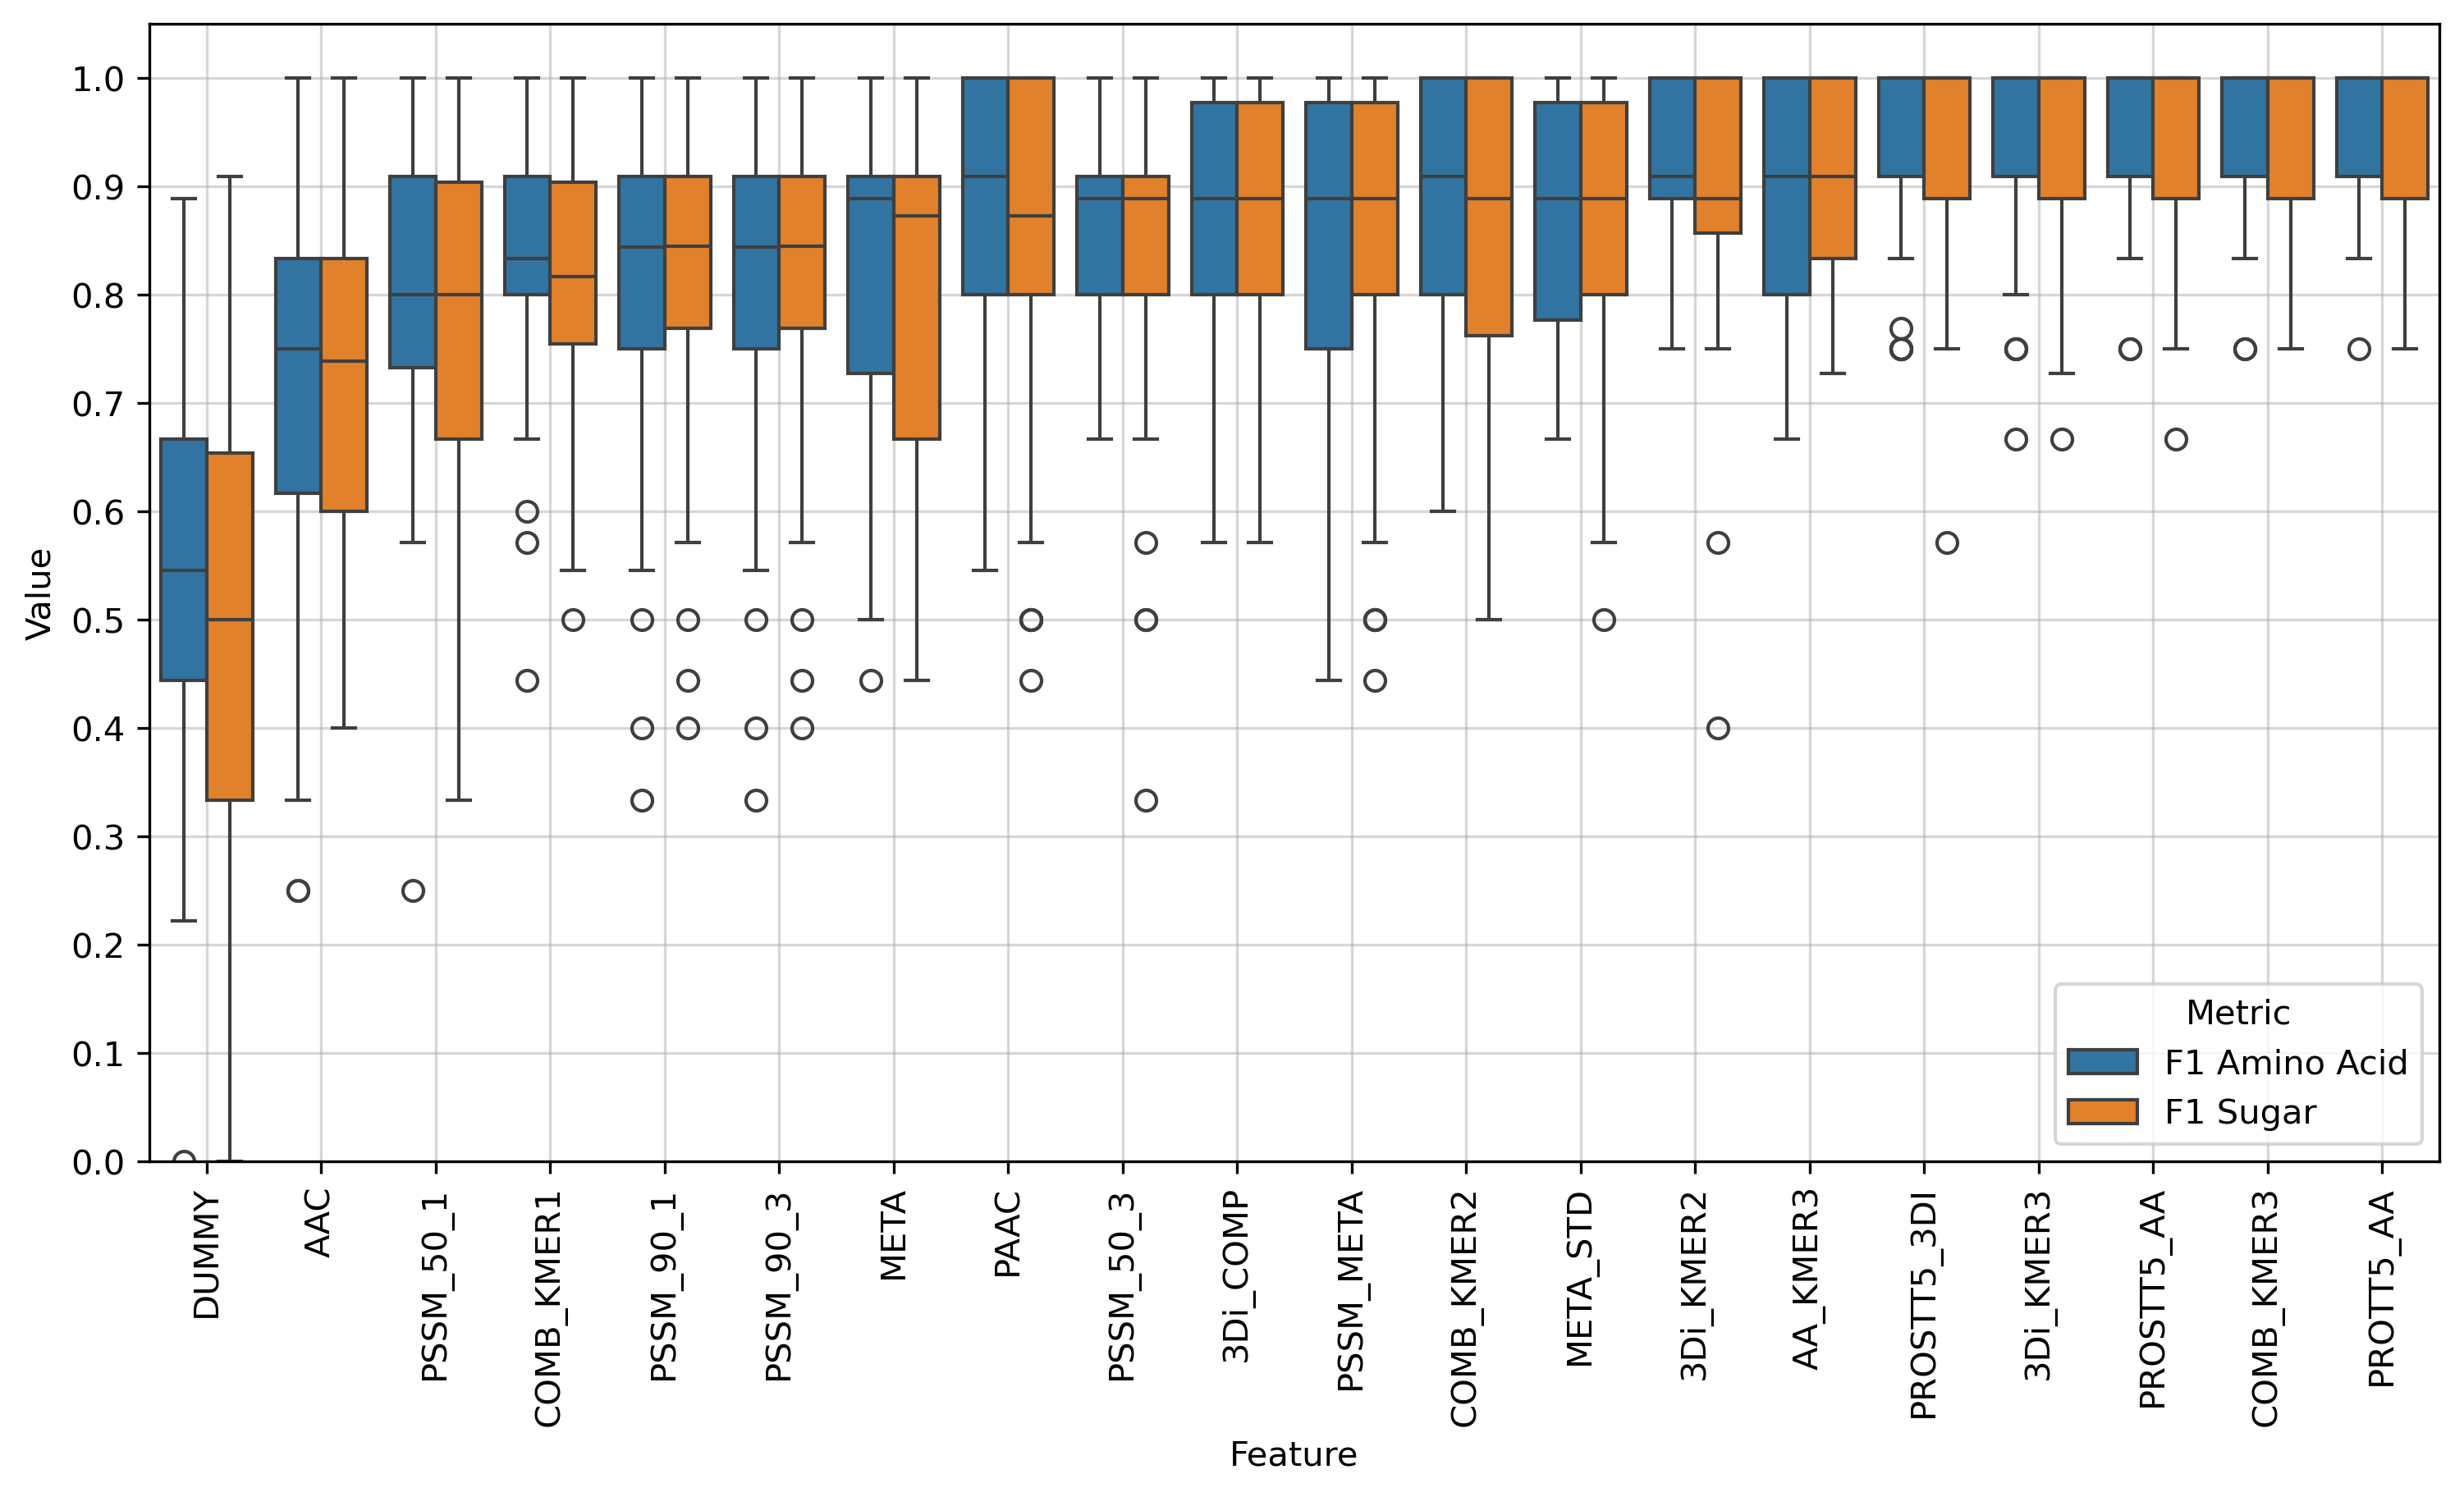

In [ ]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Amino Acid","F1 Sugar"]
)

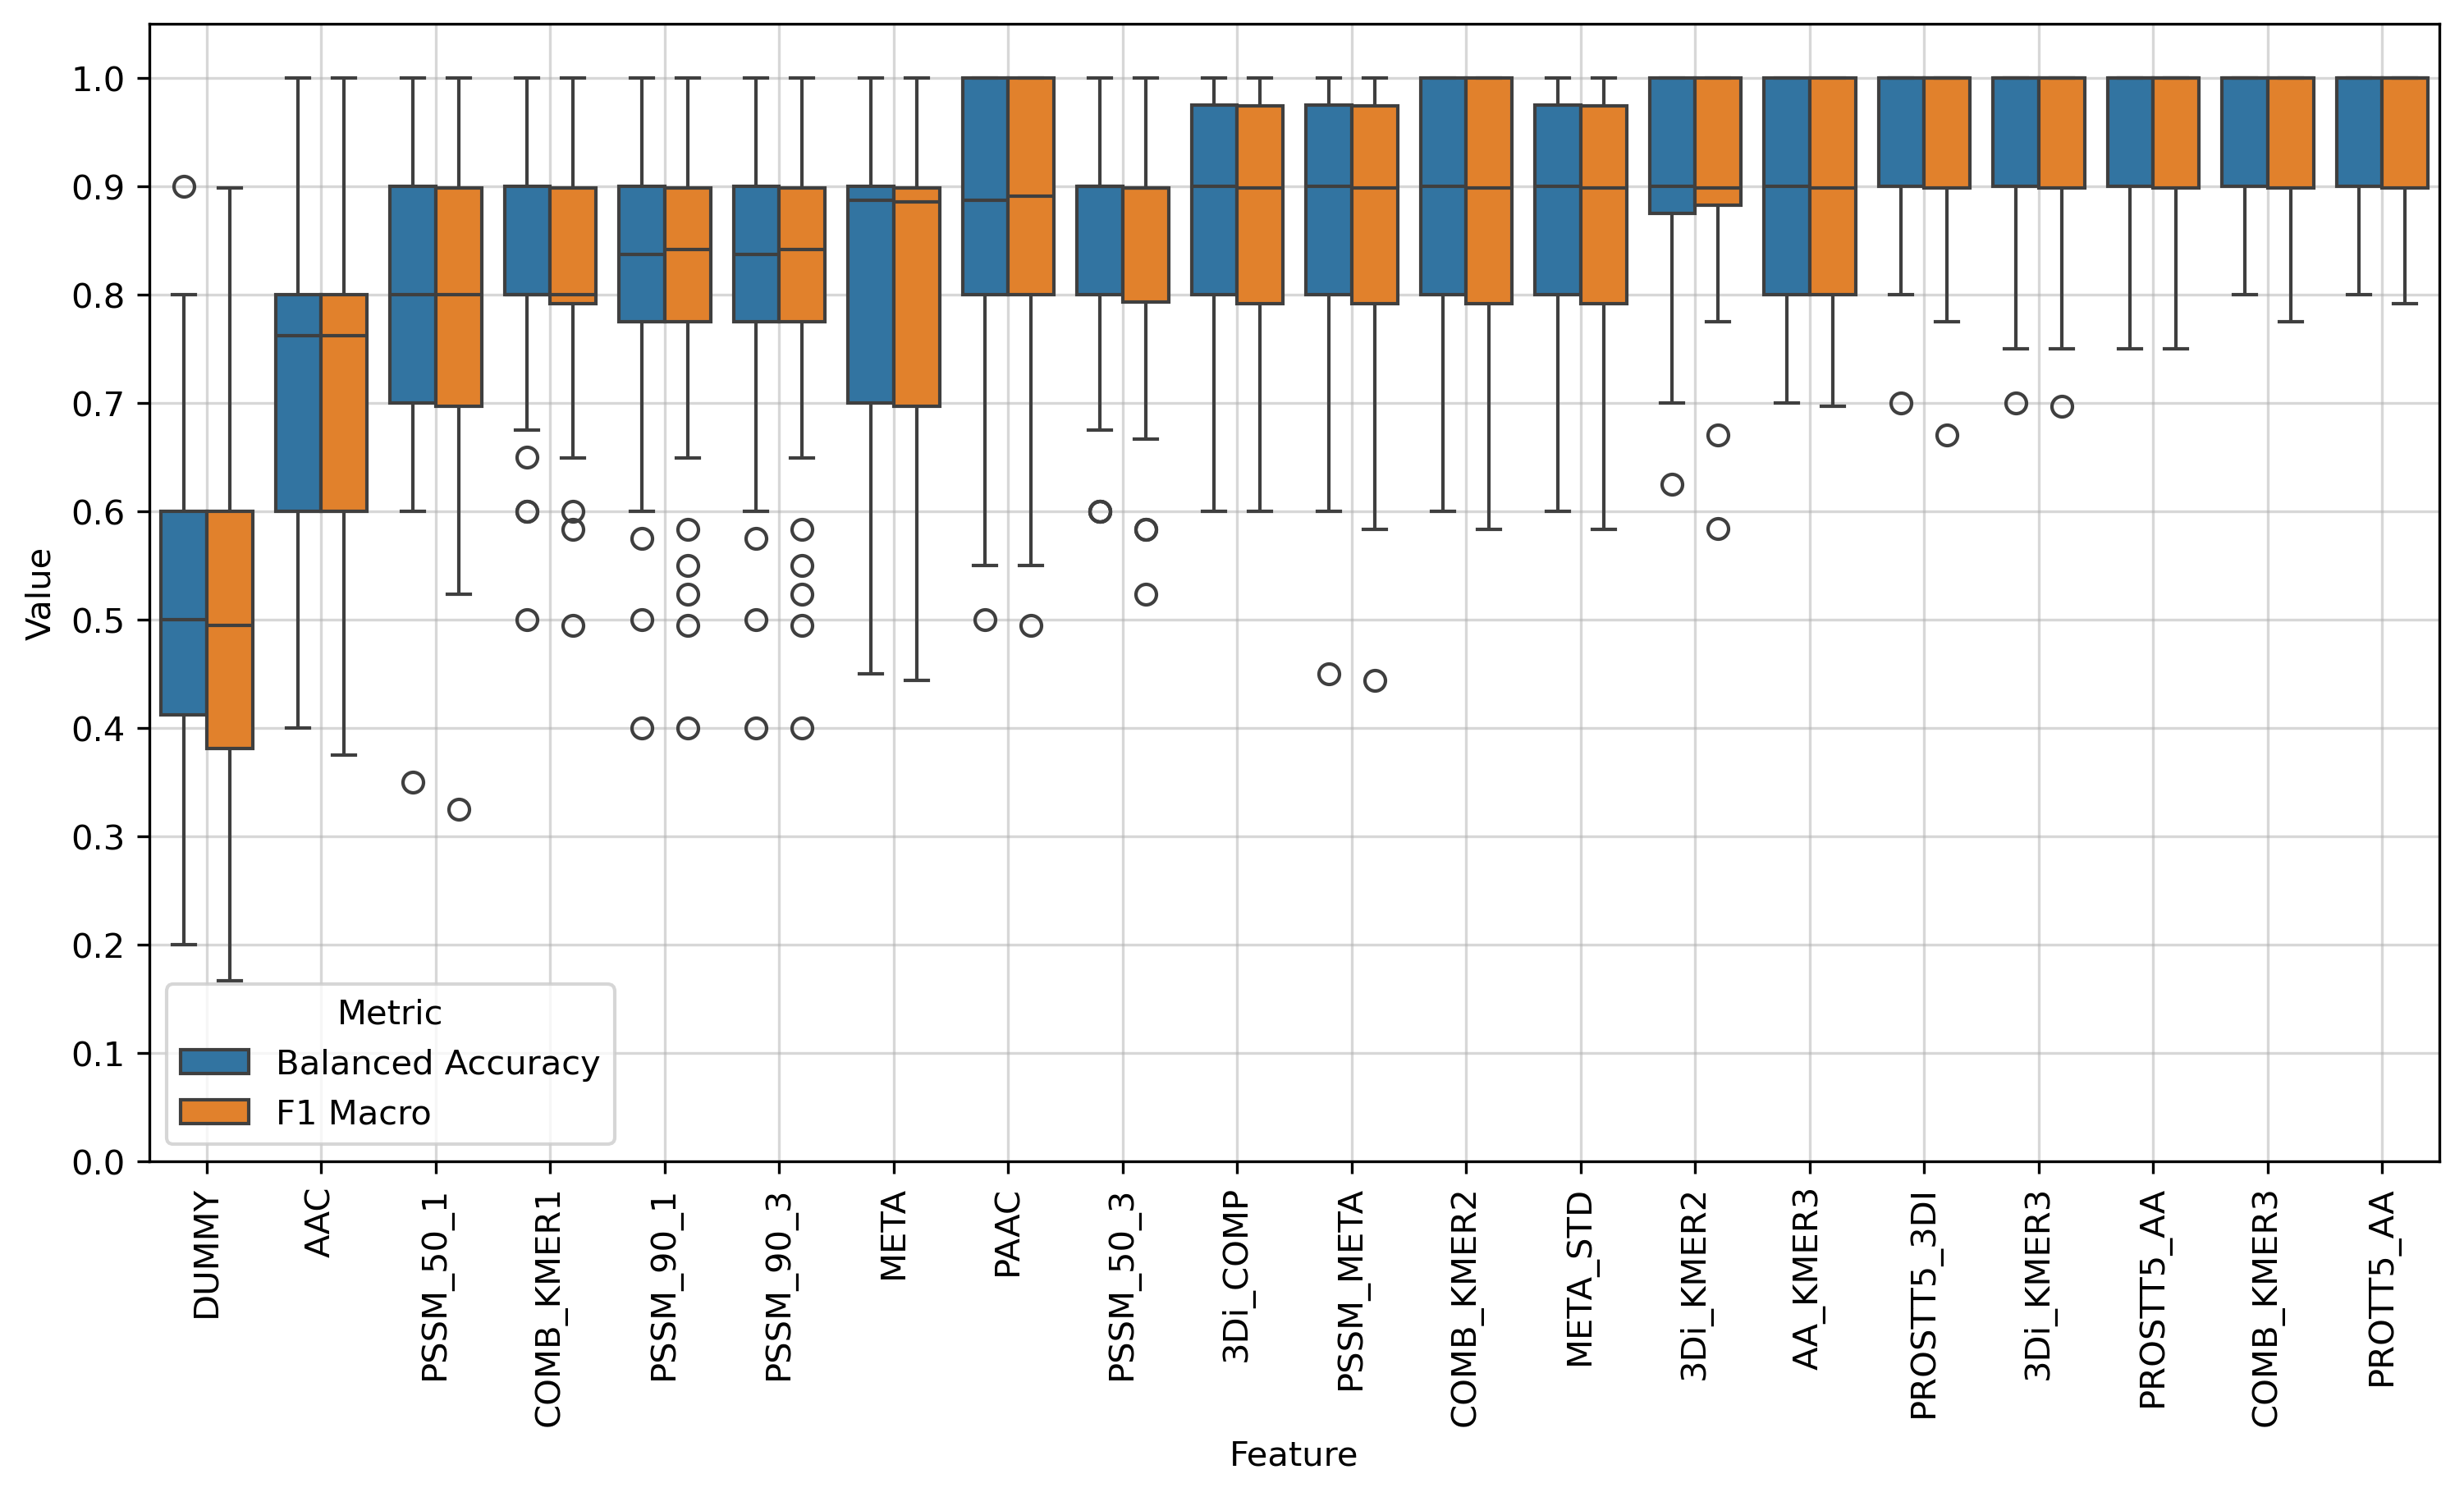

In [ ]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Macro", "Balanced Accuracy"]
)